In [13]:
import pickle

from experiments.src.factory import small
from experiments.src.data import ToyData1
from experiments.src.experiment import *
from jax import random

In [12]:
%load_ext autoreload
%autoreload 2

In [2]:
bnn = small.bnn()
data = ToyData1(D_X=2, train_size=100)

In [30]:
delta = small.map(bnn, data)

delta.train(random.PRNGKey(0))
delta.make_predictions(random.PRNGKey(1))
# delta.to_pickle("pik/delta_128_256_64.pk")
delta.make_plots().savefig(f"figs/0map.png")

# del delta

Initial eval loss: -629.7411 (lik: 44.4435, kl: -585.2976)


0it [00:00, ?it/s]


SVI elapsed time: 0.06514716148376465


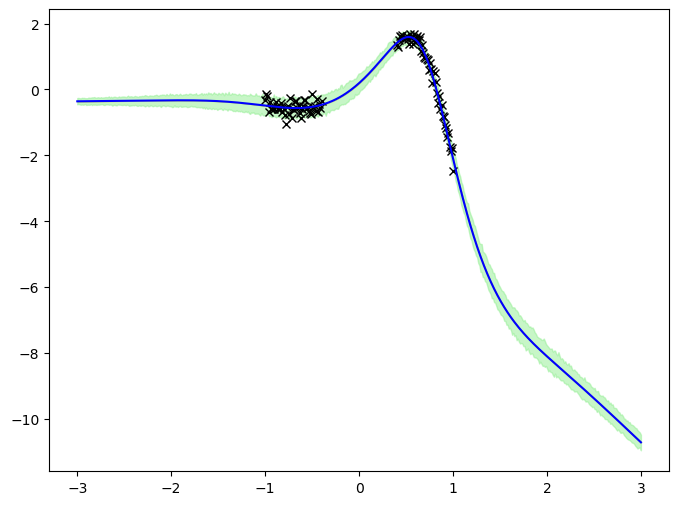

In [31]:
delta = AutoDeltaVIExperiment.from_pickle(bnn, data, "pik/delta_small.pk")

delta.make_predictions(random.PRNGKey(1))
delta.make_plots().savefig(f"figs/00map.png")

In [ ]:
# hmc = small.hmc(bnn, data, delta)
# hmc.train(random.PRNGKey(0))
# hmc.to_pickle("pik/hmc_small.png")
# hmc = BasicHMCExperiment.from_pickle(bnn, data, "pik/hmc_small.png")
# hmc.make_predictions(random.PRNGKey(1))
# hmc.make_plots().savefig(f"figs/00hmc.png")

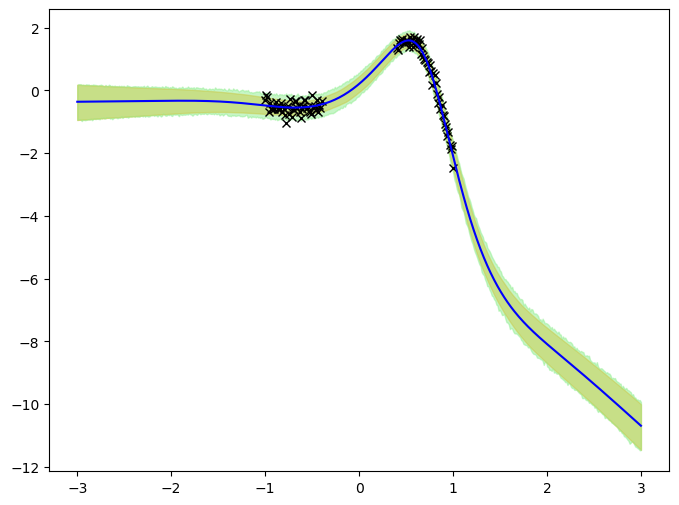

In [34]:
# laplace = small.diag_laplace(bnn, data, delta)
# laplace.train(random.PRNGKey(0))
# laplace.to_pickle("pik/laplace_small.pk")
# laplace.make_predictions(random.PRNGKey(1))
# laplace.make_plots().savefig("figs/0lap.png")

# del laplace

Initial eval loss: -629.5203 (lik: 44.2335, kl: -585.2868)


0it [00:00, ?it/s]


SVI elapsed time: 0.06115603446960449


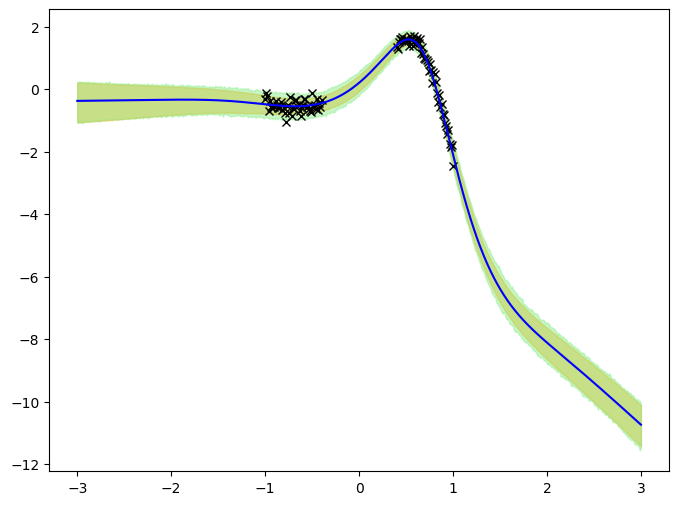

In [25]:
laplace = AutoDiagonalLaplaceExperiment.from_pickle(bnn, data, "pik/laplace_small.pk")
laplace.make_predictions(random.PRNGKey(1))
laplace.make_plots().savefig("figs/00lap.png")

100%|██████████| 10000/10000 [00:14<00:00, 686.10it/s, init loss: -629.7411, avg. loss [9501-10000]: -593.8615]


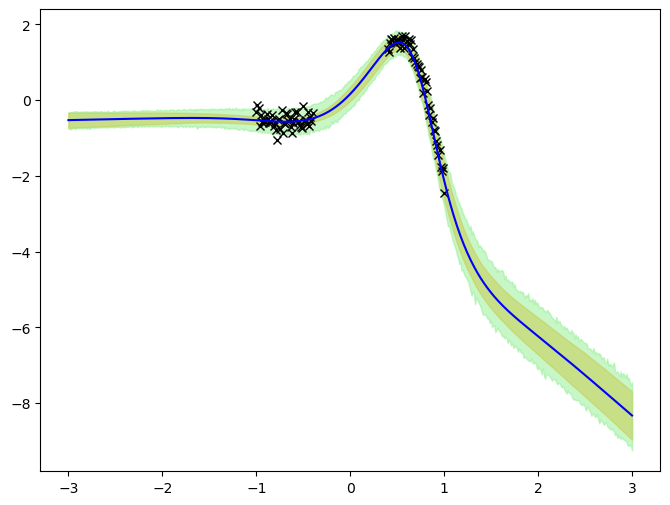

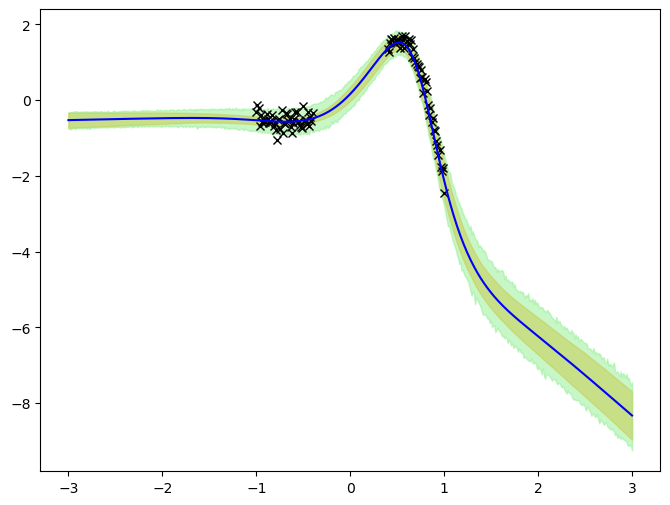

In [35]:
# swag = small.swag(bnn, data, delta)
# swag.train(random.PRNGKey(0))
# swag.to_pickle("pik/swag_small.pk")
# swag.make_predictions(random.PRNGKey(1))
# swag.make_plots()

Initial eval loss: -629.7411 (lik: 44.4435, kl: -585.2976)


0it [00:00, ?it/s]


SVI elapsed time: 0.031113862991333008


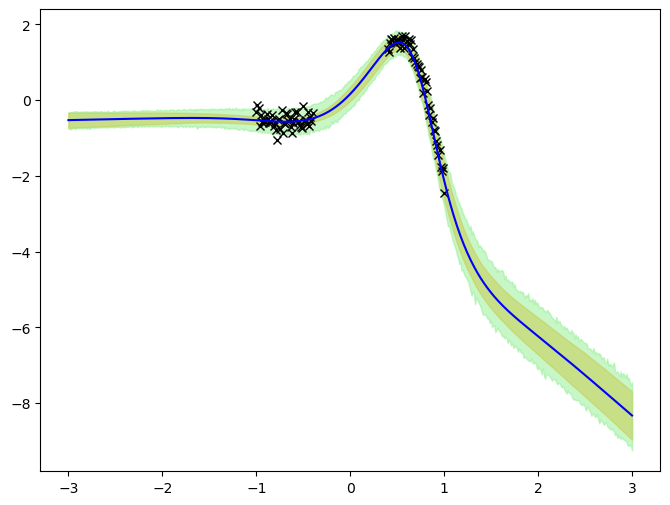

In [38]:
swag = SWAGExperiment.from_pickle(bnn, data, "pik/swag_small.pk")
swag.make_predictions(random.PRNGKey(1))
_ = swag.make_plots()

Initial eval loss: 4534.4517 (lik: -158.4048, kl: 4376.0469)


100%|██████████| 50/50 [01:32<00:00,  1.85s/it, init loss: 4534.4507, avg. train loss / eval. loss [98000-100000]: 65.8408 / 65.2937]



SVI elapsed time: 94.30136895179749


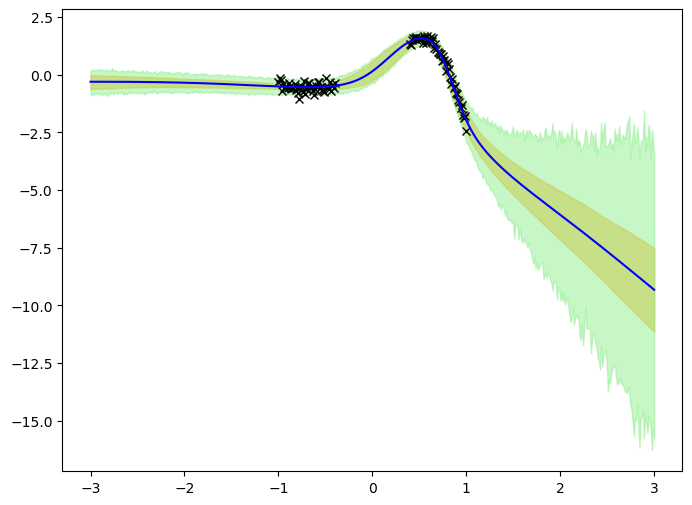

In [42]:
bnn.BETA = small.BETA
vi = small.mfvi(bnn, data)
vi.train(random.PRNGKey(0))
bnn.BETA = 1.0
vi.to_pickle("pik/mfvi_small.pk")
vi.make_predictions(random.PRNGKey(1))
_ = vi.make_plots()